# Task - 3:
# Predictive Modeling with Linear Regression : Build a predictive model using linear regression to predict a numerical outcome based on one or more features. Use a dataset with a continuous target variable.

# Step 1: Load the Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the dataset
housing = pd.read_csv("housing.csv")
housing.head()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Step 2: Explore the Data

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          20640 non-null  int64  
 1   longitude           20640 non-null  float64
 2   latitude            20640 non-null  float64
 3   housing_median_age  20640 non-null  float64
 4   total_rooms         20640 non-null  float64
 5   total_bedrooms      20433 non-null  float64
 6   population          20640 non-null  float64
 7   households          20640 non-null  float64
 8   median_income       20640 non-null  float64
 9   median_house_value  20640 non-null  float64
 10  ocean_proximity     20640 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.7+ MB


In [4]:
housing.describe()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,10319.500000,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,5958.399114,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,0.000000,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,5159.750000,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,10319.500000,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,15479.250000,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,20639.000000,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>],
       [<Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

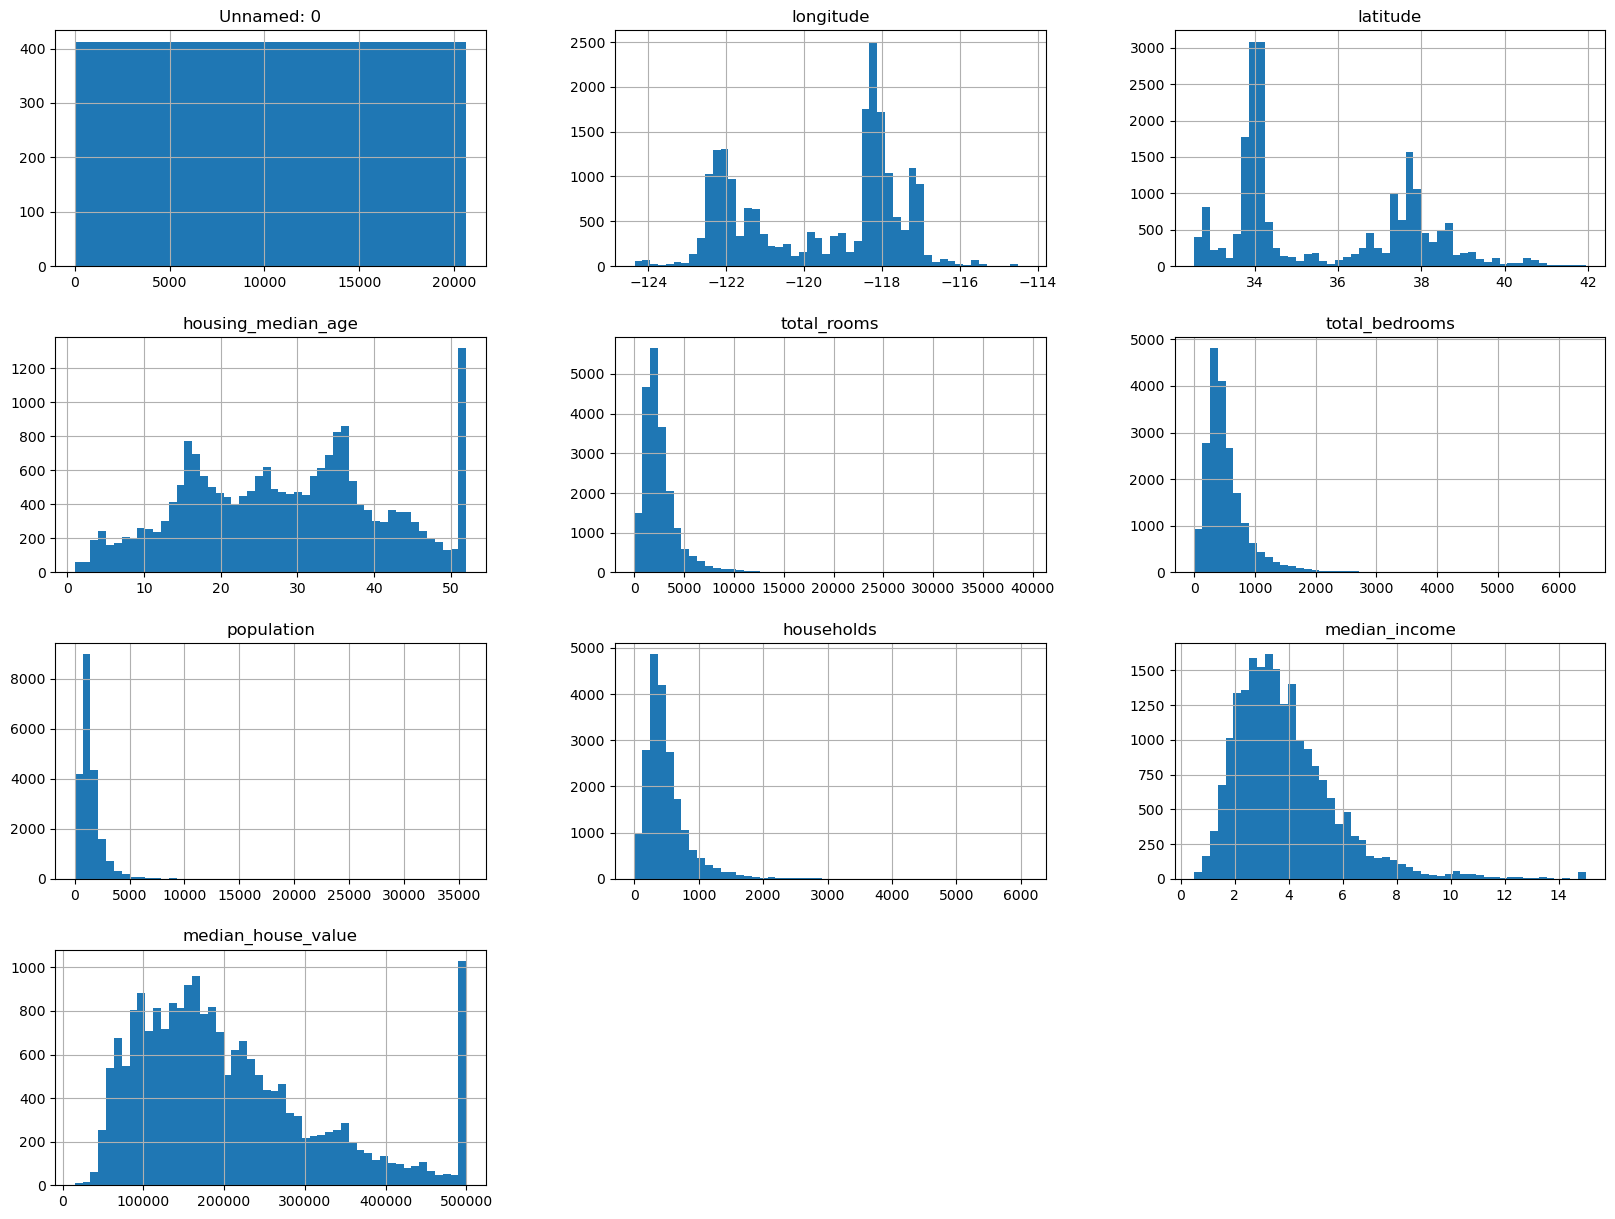

In [5]:
housing.hist(bins=50, figsize=(20, 15))

# Step 3: Preprocess the Data

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


In [7]:
# Separate features and target variable
housing_labels = housing["median_house_value"].copy()
housing = housing.drop("median_house_value", axis=1)

In [8]:
# Identify numerical and categorical columns
num_cols = housing.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = housing.select_dtypes(exclude=[np.number]).columns.tolist()

In [9]:
# Create a pipeline for numerical features
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

In [10]:
# Create a pipeline for categorical features
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('onehot', OneHotEncoder())
])

In [11]:
# Combine pipelines
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

# Preprocess the data
housing_prepared = full_pipeline.fit_transform(housing)

# Step 4: Split the Data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(housing_prepared, housing_labels, test_size=0.2, random_state=42)

# Step 5: Train the Model

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
# Initialize the model
model = LinearRegression()

In [15]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

# Step 6: Evaluate the Model

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
# Predict on the test set
y_pred = model.predict(X_test)

In [18]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [19]:
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 4898860433.524681
R-squared Score: 0.626157900711201


# Step 7: Interpret the Results

In [20]:
# Extract feature names
num_features = num_cols
cat_features = full_pipeline.named_transformers_['cat']['onehot'].get_feature_names_out(cat_cols)
all_features = np.concatenate([num_features, cat_features])

In [21]:
# Coefficients of the model
coefficients = pd.DataFrame(model.coef_, all_features, columns=['Coefficient'])
coefficients

,Coefficient
Unnamed: 0,5202.072542
longitude,-49767.382342
latitude,-51406.116302
housing_median_age,14668.751167
total_rooms,-13693.940658
total_bedrooms,42806.688984
population,-43187.670120
households,19319.225164
median_income,74850.192142
ocean_proximity_<1H OCEAN,-18988.565454
